In [287]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [288]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'
static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
models =  ["all_features"] + static_features + time_features
models = ["all_features"] + ["all_features_CompleteTopologyShuffle", "all_features_IPShuffle", "all_features_OSDiversity", "all_features_ServiceDiversity"]
# metric = "mtd_freq"
# models = [
#     f"{metric}_CompleteTopologyShuffle",
#     f"{metric}_IPShuffle",
#     f"{metric}_OSDiversity",
#     f"{metric}_ServiceDiversity"
# ] + ["all_features_OSDiversity", "all_features_ServiceDiversity"]

{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4659171297011173, 'attack_path_exposure': 0.9358105558657954, 'ROA': 0.8333602423320229, 'risk': 0.9295818359469153}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4450191486143427, 'attack_path_exposure': 0.9357752473230252, 'ROA': 0.8333602423320229, 'risk': 0.9486668488685682}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


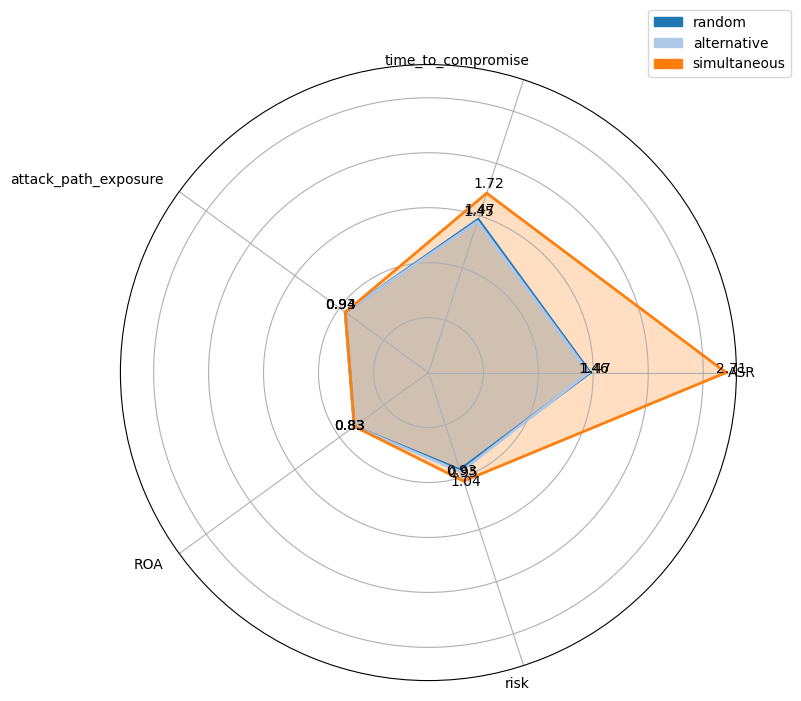

In [289]:
radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

all_features
{'all_features': {'ASR': 1.5416666666666667, 'time_to_compromise': 1.513505199722491, 'attack_path_exposure': 2.4625282973906835, 'ROA': 0.8344631584046012, 'risk': 0.8069047188687185}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


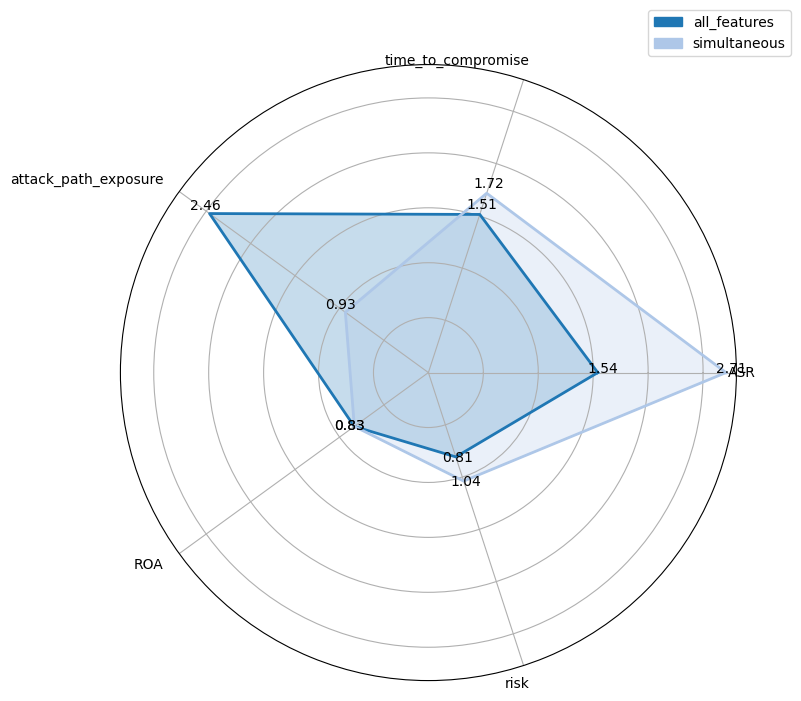

all_features_CompleteTopologyShuffle
{'all_features_CompleteTopologyShuffle': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4139861945200594, 'attack_path_exposure': 2.1904509564940917, 'ROA': 0.9197330587203315, 'risk': 1.008028922168205}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


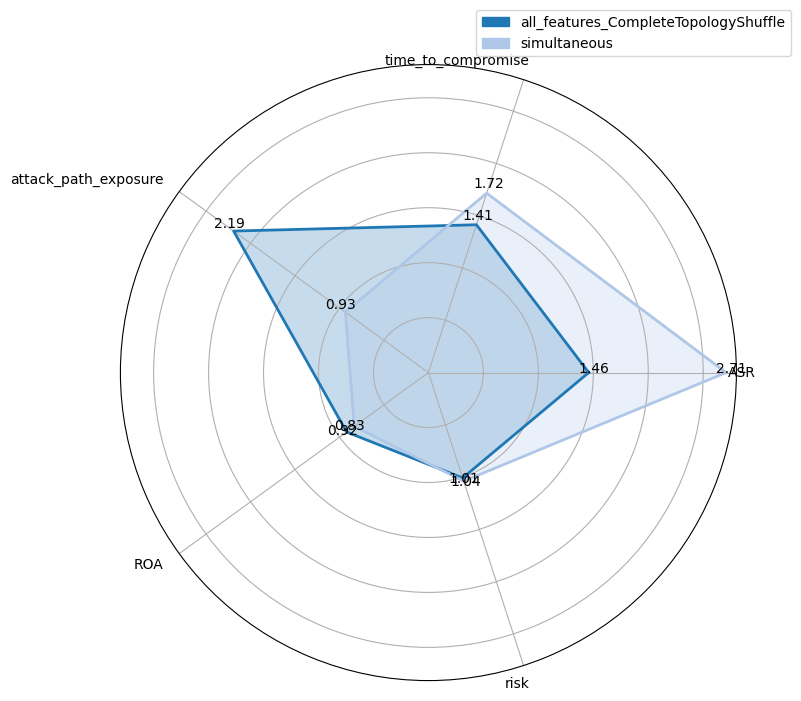

all_features_IPShuffle
{'all_features_IPShuffle': {'ASR': 1.6666666666666667, 'time_to_compromise': 1.528955289859682, 'attack_path_exposure': 1.9544208037825064, 'ROA': 0.9999784381041248, 'risk': 1.1139440017442184}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


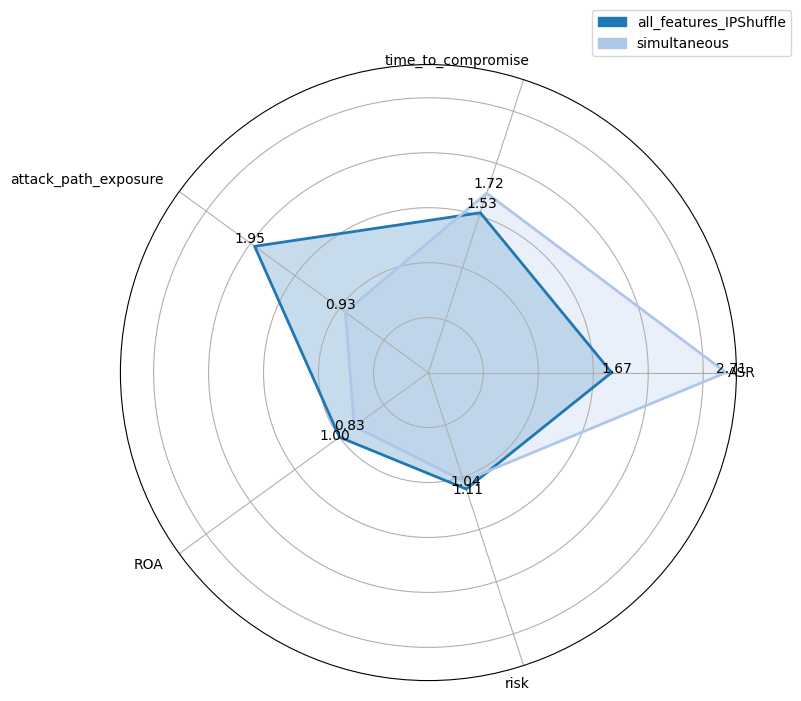

all_features_OSDiversity
{'all_features_OSDiversity': {'ASR': 1.510344827586207, 'time_to_compromise': 1.6967394119707797, 'attack_path_exposure': 2.72377438060095, 'ROA': 1.7223676428781454, 'risk': 1.5090743567453453}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


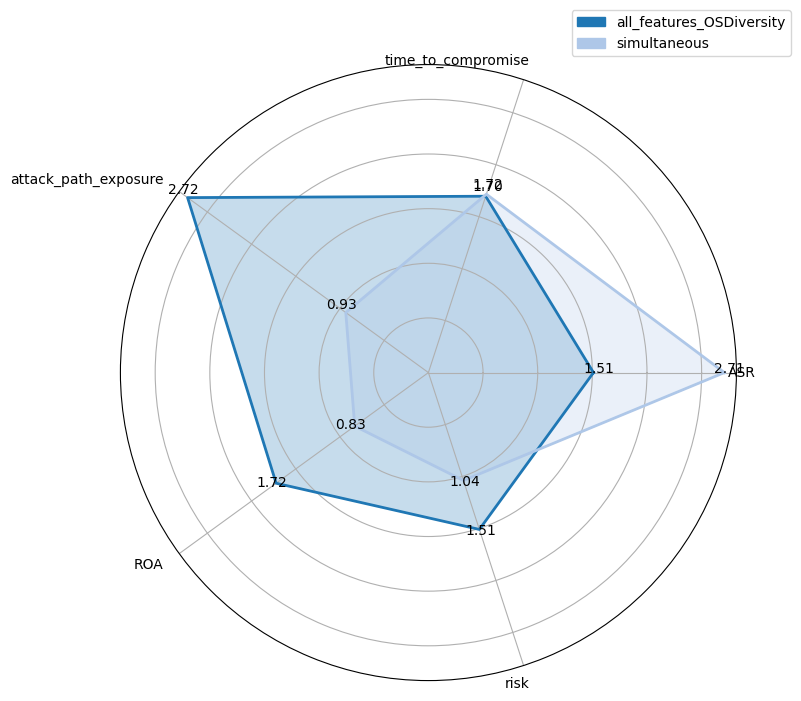

all_features_ServiceDiversity
{'all_features_ServiceDiversity': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.6223214357920177, 'attack_path_exposure': 2.518184587267744, 'ROA': 1.2058316902941126, 'risk': 1.2362477875473157}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


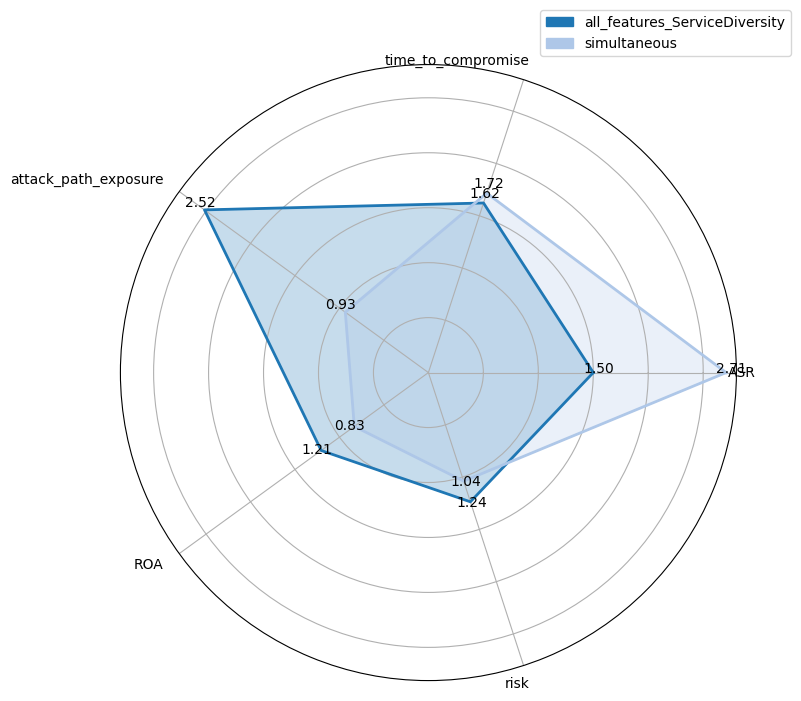

In [290]:
for model in models:

    print(model)
    radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
    schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
    # schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, 'random', 'alternative', "simultaneous"],run_trial = False)).to_dict()
    print(schemes_data)
    radar.plot_n_schemes(schemes_data)
 

{'all_features': {'ASR': 1.5416666666666667, 'time_to_compromise': 1.513505199722491, 'attack_path_exposure': 2.4625282973906835, 'ROA': 0.8344631584046012, 'risk': 0.8069047188687185}, 'all_features_CompleteTopologyShuffle': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4139861945200594, 'attack_path_exposure': 2.1904509564940917, 'ROA': 0.9197330587203315, 'risk': 1.008028922168205}, 'all_features_IPShuffle': {'ASR': 1.6666666666666667, 'time_to_compromise': 1.528955289859682, 'attack_path_exposure': 1.9544208037825064, 'ROA': 0.9999784381041248, 'risk': 1.1139440017442184}, 'all_features_OSDiversity': {'ASR': 1.510344827586207, 'time_to_compromise': 1.6967394119707797, 'attack_path_exposure': 2.72377438060095, 'ROA': 1.7223676428781454, 'risk': 1.5090743567453453}, 'all_features_ServiceDiversity': {'ASR': 1.4999999999999998, 'time_to_compromise': 1.6223214357920177, 'attack_path_exposure': 2.518184587267744, 'ROA': 1.2058316902941126, 'risk': 1.2362477875473157}}


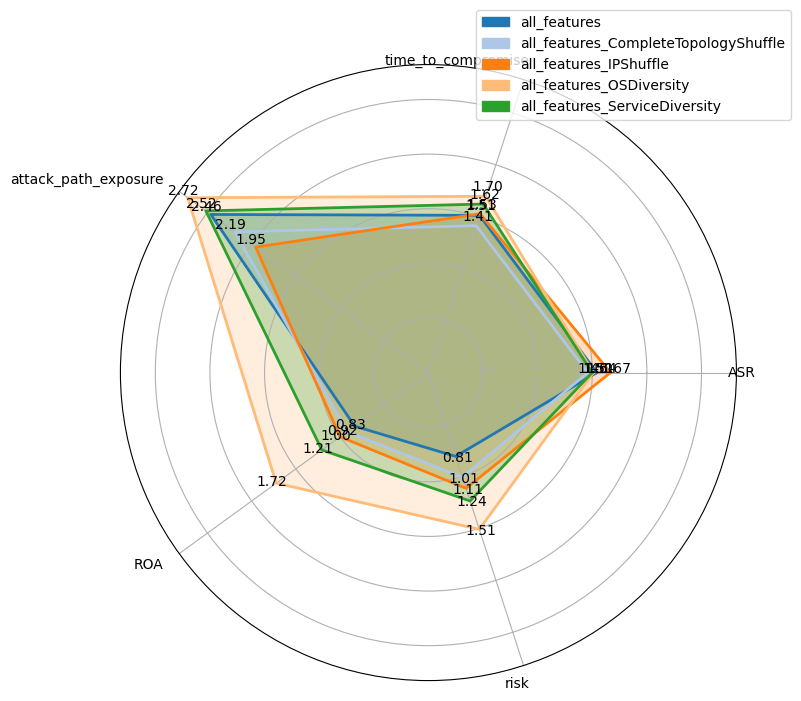

In [291]:

radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "overview", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(models,run_trial = False)).T.drop(columns=[ 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", "shortest_path_variability", "MEF"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [299]:
import pandas as pd
from tabulate import tabulate

# Define the data for the table with full feature names
data = {
    "Metric/Feature": [
        "All features",
        "Host Compromise Ratio (HCR)",
        "Exposed Endpoints (EE)",
        "Attack Path Exposure (APE)",
        "Average Security Rating (ASR)",
        "Return on Attack (ROA)",
        "Shortest Path Variability (SPV)",
        "Risk (RISK)",
        "MTD Execution Time (MEF)",
        "Mean Time to Compromise (MTTC)",
        "Time Since Last MTD (TSLM)"
    ],
    "All MTD": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
    "CTSuffle": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
    "IPShuffle": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
    "OSDiversity": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"],
    "ServiceDiversity": ["/", "/", "/", "/", "/", "/", "/", "/", "/", "/", "/"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------------------+---------+----------+-----------+-------------+------------------+
|         Metric/Feature          | All MTD | CTSuffle | IPShuffle | OSDiversity | ServiceDiversity |
+---------------------------------+---------+----------+-----------+-------------+------------------+
|          All features           |    /    |    /     |     /     |      /      |        /         |
|   Host Compromise Ratio (HCR)   |    /    |    /     |     /     |      /      |        /         |
|     Exposed Endpoints (EE)      |    /    |    /     |     /     |      /      |        /         |
|   Attack Path Exposure (APE)    |    /    |    /     |     /     |      /      |        /         |
|  Average Security Rating (ASR)  |    /    |    /     |     /     |      /      |        /         |
|     Return on Attack (ROA)      |    /    |    /     |     /     |      /      |        /         |
| Shortest Path Variability (SPV) |    /    |    /     |     /     |      /      |

In [293]:
# plot_comparison(schemes_data)